# Dados Utilizados
# Rede Amazônica de Informação Socioambiental Georreferenciada
*Garimpo Ilegal (2023) https://www.raisg.org/pt-br/mapas/*
# Fundação Nacional dos Povos Indígenas
*Terras Indígenas (2024): https://www.gov.br/funai/pt-br/atuacao/terras-indigenas/geoprocessamento-e-mapas*
#Instituto Brasileiro de Geografia e Estatística
*Amazônia Legal (2020): https://www.ibge.gov.br/geociencias/cartas-e-mapas/redes-geograficas/15819-amazonia-legal.html*
*Base Cartográfica Contínua - 1:250.000 (2023): https://www.ibge.gov.br/geociencias/downloads-geociencias.html*


# Distribuição da Mineração Ilegal no Brasil por Substância (Mapa de Pontos)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


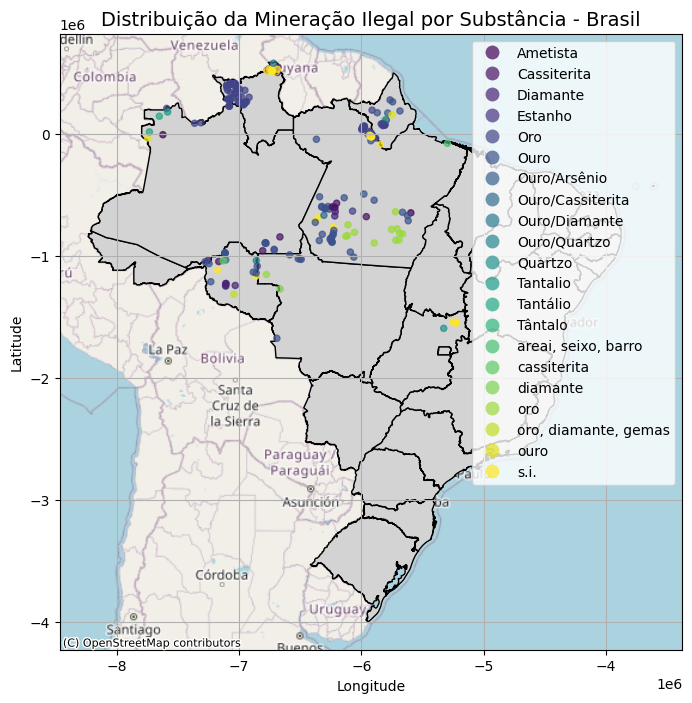

In [ ]:
# 📌 Instalar dependências
!pip install contextily

# 📌 Importação das bibliotecas necessárias
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx  # Para adicionar um fundo de mapa
from google.colab import drive

# 📌 1. Conectar ao Google Drive
drive.mount('/content/drive')

# 📌 2. Carregar os dados de mineração ilegal (arquivo .shp no Drive)
file_path = "/content/drive/MyDrive/MineriaIlegal_2022/MineriaIlegal_pt.shp"
gdf = gpd.read_file(file_path)

# 📌 3. Filtrar apenas os registros do Brasil
gdf_brasil = gdf[gdf["país"].str.contains("Brasil", na=False, case=False)]

# 📌 4. Baixar o shapefile do Brasil para referência
url_brasil = "https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson"
brasil = gpd.read_file(url_brasil)

# 📌 5. Converter a projeção dos dados para Web Mercator (EPSG:3857) para sobreposição correta
gdf_brasil = gdf_brasil.to_crs(epsg=3857)
brasil = brasil.to_crs(epsg=3857)

# 📌 6. Criar o mapa da mineração ilegal no Brasil
fig, ax = plt.subplots(figsize=(10, 8))

# Desenhar o mapa do Brasil
brasil.plot(ax=ax, color="lightgray", edgecolor="black")

# Plotar os pontos da mineração ilegal coloridos por substância explorada
gdf_brasil.plot(ax=ax, column="substancia", cmap="viridis", legend=True, markersize=20, alpha=0.7)

# Adicionar um fundo de mapa (tiles)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Configurar título e exibição
plt.title("Distribuição da Mineração Ilegal por Substância - Brasil", fontsize=14)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()


# Distribuição de Substâncias Minerais Exploradas no Brasil (Gráfico)

       país                             descripci     metodoexpl substancia  \
492  Brasil     Localização a partir de base cprm           None       Ouro   
493  Brasil                                  None  cielo abierto       None   
494  Brasil               Localización de garimpo  Cielo abierto        Oro   
495  Brasil  información sin localización precisa           None       s.i.   
496  Brasil     Localização a partir de base cprm           s.i.       Ouro   

    contaminan                         ator situación  coordenada  coordena_1  \
492       s.i.                         s.i.      s.i.         0.0         0.0   
493       None                         None    activo         0.0         0.0   
494       None  garimpeiro, sin inf. status    activo         0.0         0.0   
495       None                         s.i.  inactivo         0.0         0.0   
496       None                         s.i.      s.i.         0.0         0.0   

    fecha_situ                        

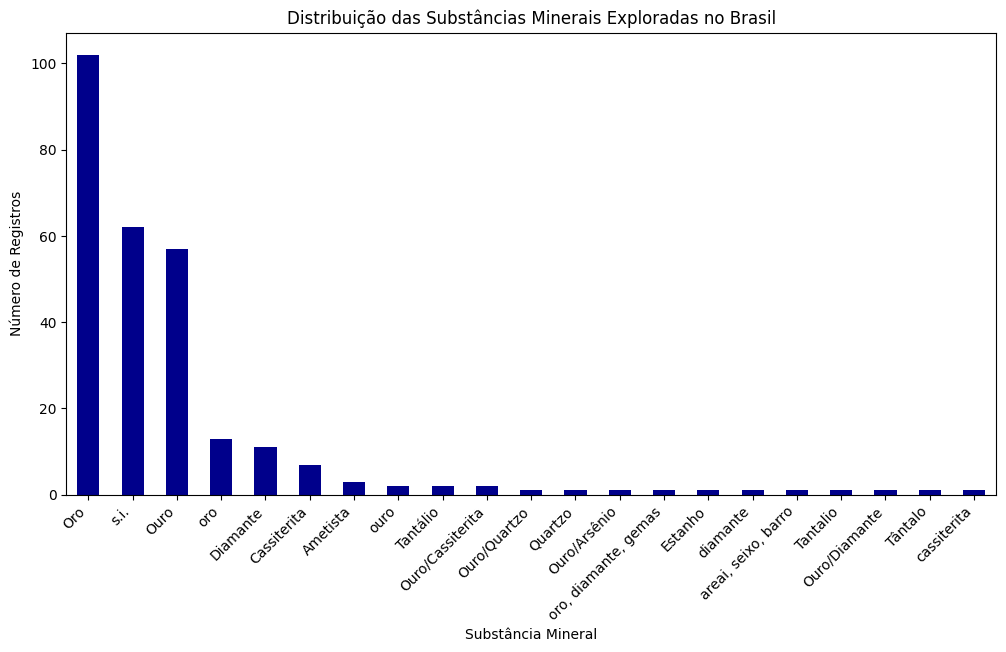

In [ ]:
# Importação das bibliotecas necessárias
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados do shapefile
file_path = "/content/drive/MyDrive/MineriaIlegal_2022/MineriaIlegal_pt.shp"
gdf = gpd.read_file(file_path)

# Filtrar apenas os dados referentes ao Brasil
gdf = gdf[gdf["país"] == "Brasil"]

# Verificar as primeiras linhas para conferir o carregamento correto
print(gdf.head())

# ---------------------------
# Análise da Distribuição das Substâncias Minerais
# ---------------------------

# Contar a frequência de cada substância explorada
substancias_contagem = gdf["substancia"].value_counts()

# Plotar um gráfico de barras para visualizar a distribuição das substâncias
plt.figure(figsize=(12, 6))
substancias_contagem.plot(kind="bar", color="darkblue")
plt.xlabel("Substância Mineral")
plt.ylabel("Número de Registros")
plt.title("Distribuição das Substâncias Minerais Exploradas no Brasil")
plt.xticks(rotation=45, ha="right")
plt.show()

# ---------------------------
# Visualização Espacial dos Pontos de Mineração Ilegal no Brasil
# ---------------------------

# Criar um mapa simples com os


# Evolução Temporal da Mineração Ilegal no Brásil (Gráfico)


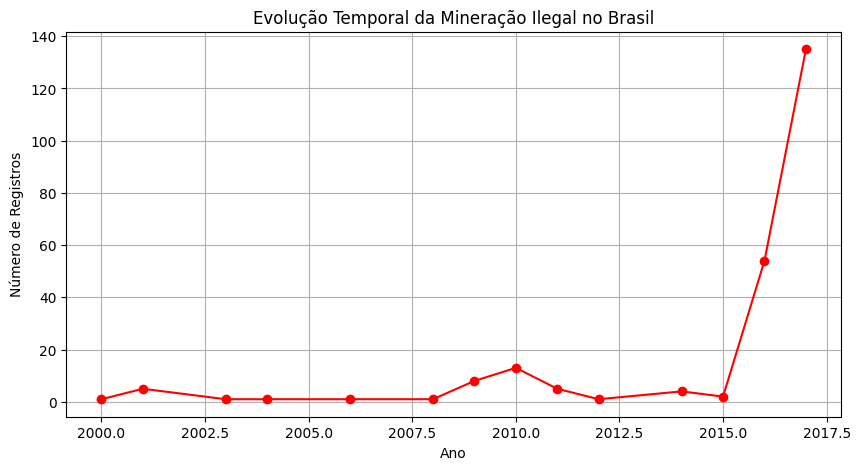

In [ ]:
# ---------------------------
# Análise Temporal da Mineração Ilegal
# ---------------------------

# Converter a coluna de data para numérico (caso necessário)
gdf["fecha_situ"] = pd.to_numeric(gdf["fecha_situ"], errors="coerce")

# Agrupar os dados por ano e contar o número de ocorrências
temporal_analysis = gdf["fecha_situ"].value_counts().sort_index()

# Criar o gráfico de séries temporais
plt.figure(figsize=(10, 5))
plt.plot(temporal_analysis.index, temporal_analysis.values, marker="o", linestyle="-", color="red")
plt.xlabel("Ano")
plt.ylabel("Número de Registros")
plt.title("Evolução Temporal da Mineração Ilegal no Brasil")
plt.grid()
plt.show()


# Heatmap Mineração Ilegal no Brasil

In [ ]:
import geopandas as gpd
import folium
from folium.plugins import HeatMap

from google.colab import files

uploaded = files.upload()  # Permite selecionar e enviar o arquivo do seu computador

# 🔹 1. Carregar o shapefile
caminho_shapefile = "MineriaIlegal_pt.shp"
gdf = gpd.read_file(caminho_shapefile)

# 🔹 2. Garantir que os dados tenham coordenadas no sistema WGS84 (EPSG:4326)
if gdf.crs and gdf.crs.to_epsg() != 4326:
    gdf = gdf.to_crs(epsg=4326)  # Converter para WGS84 se necessário

# 🔹 3. Criar uma lista de coordenadas para o mapa de calor
coordenadas = [
    [point.y, point.x] for point in gdf.geometry if point.geom_type == "Point"
]

# 🔹 4. Criar o mapa base centrado no Brasil
mapa = folium.Map(location=[-10, -55], zoom_start=4)

# 🔹 5. Adicionar o HeatMap
HeatMap(coordenadas, radius=15).add_to(mapa)

# 🔹 6. Exibir o mapa
mapa


Saving MineriaIlegal_pt.cpg to MineriaIlegal_pt.cpg
Saving MineriaIlegal_pt.dbf to MineriaIlegal_pt.dbf
Saving mineriaIlegal_pt.htm to mineriaIlegal_pt.htm
Saving mineriaIlegal_pt.jpg to mineriaIlegal_pt.jpg
Saving MineriaIlegal_pt.lyr to MineriaIlegal_pt.lyr
Saving MineriaIlegal_pt.prj to MineriaIlegal_pt.prj
Saving MineriaIlegal_pt.sbn to MineriaIlegal_pt.sbn
Saving MineriaIlegal_pt.sbx to MineriaIlegal_pt.sbx
Saving MineriaIlegal_pt.shp to MineriaIlegal_pt.shp
Saving MineriaIlegal_pt.shx to MineriaIlegal_pt.shx


# Mineração Ilegal em Terras Indígenas

In [ ]:
import geopandas as gpd
import folium
from folium.plugins import HeatMap

from google.colab import files

uploaded = files.upload()  # Permite selecionar e enviar o arquivo do seu computador


Saving MineriaIlegal_pol.cpg to MineriaIlegal_pol.cpg
Saving MineriaIlegal_pol.dbf to MineriaIlegal_pol.dbf
Saving MineriaIlegal_pol.htm to MineriaIlegal_pol.htm
Saving MineriaIlegal_pol.jpg to MineriaIlegal_pol.jpg
Saving MineriaIlegal_pol.lyr to MineriaIlegal_pol.lyr
Saving MineriaIlegal_pol.prj to MineriaIlegal_pol.prj
Saving MineriaIlegal_pol.sbn to MineriaIlegal_pol.sbn
Saving MineriaIlegal_pol.sbx to MineriaIlegal_pol.sbx
Saving MineriaIlegal_pol.shp to MineriaIlegal_pol.shp
Saving MineriaIlegal_pol.shx to MineriaIlegal_pol.shx


In [ ]:
import geopandas as gpd
import folium
from folium.plugins import HeatMap

from google.colab import files

uploaded = files.upload()  # Permite selecionar e enviar o arquivo do seu computador

Saving tis_poligonaisPolygon.cst to tis_poligonaisPolygon.cst
Saving tis_poligonaisPolygon.dbf to tis_poligonaisPolygon.dbf
Saving tis_poligonaisPolygon.prj to tis_poligonaisPolygon.prj
Saving tis_poligonaisPolygon.shp to tis_poligonaisPolygon.shp
Saving tis_poligonaisPolygon.shx to tis_poligonaisPolygon.shx


In [ ]:
uploaded = files.upload()  # Permite selecionar e enviar o arquivo do seu computador

Saving lml_pais_a.cpg to lml_pais_a.cpg
Saving lml_pais_a.dbf to lml_pais_a.dbf
Saving lml_pais_a.prj to lml_pais_a.prj
Saving lml_pais_a.shp to lml_pais_a.shp
Saving lml_pais_a.shx to lml_pais_a.shx


In [ ]:
uploaded = files.upload()  # Permite selecionar e enviar o arquivo do seu computador

Saving Limites_Amazonia_Legal_2022.cpg to Limites_Amazonia_Legal_2022.cpg
Saving Limites_Amazonia_Legal_2022.dbf to Limites_Amazonia_Legal_2022.dbf
Saving Limites_Amazonia_Legal_2022.prj to Limites_Amazonia_Legal_2022.prj
Saving Limites_Amazonia_Legal_2022.qmd to Limites_Amazonia_Legal_2022.qmd
Saving Limites_Amazonia_Legal_2022.shp to Limites_Amazonia_Legal_2022.shp
Saving Limites_Amazonia_Legal_2022.shx to Limites_Amazonia_Legal_2022.shx


/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:198: RuntimeWarning: tis_poligonaisPolygon.shp contains polygon(s) with rings with invalid winding order. Autocorrecting them, but that shapefile should be corrected using ogr2ogr for example.
  return ogr_read(
<ipython-input-41-820a288c3ef8>:41: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  handles, labels = ax.get_legend_handles_labels()


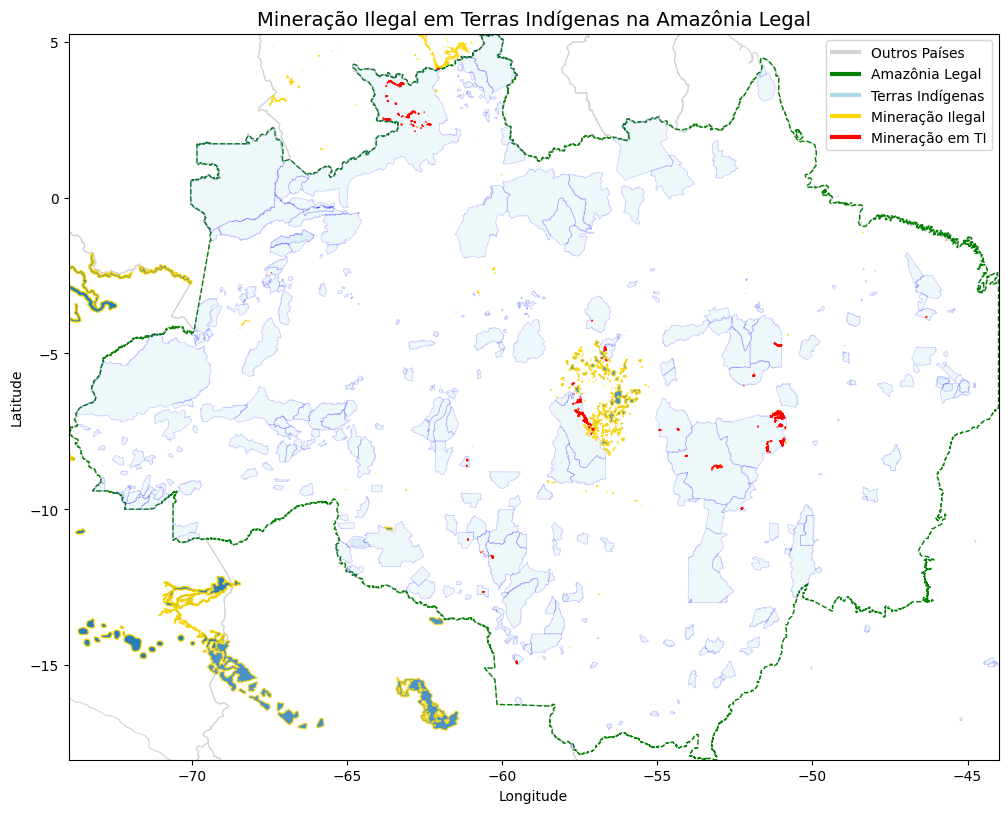

/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value 30202001955 of field undadm_cod of feature 0 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value 30202001955 of field undadm_cod of feature 1 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value 30202001955 of field undadm_cod of feature 2 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value 30202001927 of field undadm_cod of feature 3 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value 302020

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.affinity import scale

# 🔹 1. Carregar os shapefiles
caminho_mineracao = "MineriaIlegal_pol.shp"
caminho_terras_indigenas = "tis_poligonaisPolygon.shp"
caminho_limite_brasil = "lml_pais_a.shp"
caminho_amazonia_legal = "Limites_Amazonia_Legal_2022.shp"

# Carregar os dados geográficos
gdf_mineracao = gpd.read_file(caminho_mineracao).to_crs(epsg=4326)
gdf_terras_indigenas = gpd.read_file(caminho_terras_indigenas).to_crs(epsg=4326)
gdf_limite_brasil = gpd.read_file(caminho_limite_brasil).to_crs(epsg=4326)
gdf_amazonia_legal = gpd.read_file(caminho_amazonia_legal).to_crs(epsg=4326)

# 🔹 2. Identificar interseção entre mineração e terras indígenas
interseccao = gpd.overlay(gdf_mineracao, gdf_terras_indigenas, how="intersection")

# 🔹 3. Extrapolar visualmente as áreas de mineração (sem modificar os dados originais)
gdf_mineracao["geometry"] = gdf_mineracao["geometry"].apply(lambda x: scale(x, xfact=1.2, yfact=1.2))
interseccao["geometry"] = interseccao["geometry"].apply(lambda x: scale(x, xfact=1.3, yfact=1.3))

# 🔹 4. Criar visualização dos dados
fig, ax = plt.subplots(figsize=(12, 12))

# Adicionar camadas ao mapa
gdf_limite_brasil.plot(ax=ax, edgecolor="lightgray", facecolor="none", linewidth=0.8, label="Brasil (limite)")
gdf_amazonia_legal.plot(ax=ax, edgecolor="green", facecolor="none", linestyle="--", linewidth=1, label="Amazônia Legal")
gdf_terras_indigenas.plot(ax=ax, edgecolor="blue", facecolor="lightblue", alpha=0.2, linewidth=0.5, label="Terras Indígenas")

# 🔹 5. Adicionar mineração ilegal e mineração em TI com cores e tamanhos destacados
gdf_mineracao.plot(ax=ax, edgecolor="gold", alpha=0.8, linewidth=0.9, label="Mineração Ilegal")
interseccao.plot(ax=ax, color="red", alpha=1, edgecolor="red", linewidth=1.2, label="Mineração em TI")

# 🔹 6. Ajustar enquadramento para a Amazônia Legal
ax.set_xlim(gdf_amazonia_legal.total_bounds[0], gdf_amazonia_legal.total_bounds[2])
ax.set_ylim(gdf_amazonia_legal.total_bounds[1], gdf_amazonia_legal.total_bounds[3])

# 🔹 7. Melhorar a legenda
handles, labels = ax.get_legend_handles_labels()
legenda = ["Outros Países", "Amazônia Legal", "Terras Indígenas", "Mineração Ilegal", "Mineração em TI"]
cores = ["lightgray", "green", "lightblue", "gold", "red"]
custom_legenda = [plt.Line2D([0], [0], color=cor, lw=3) for cor in cores]
ax.legend(custom_legenda, legenda, loc="upper right", fontsize=10)

# Título e eixos
plt.title("Mineração Ilegal em Terras Indígenas na Amazônia Legal", fontsize=14)
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Exibir o mapa
plt.show()

# 🔹 8. Salvar o resultado
interseccao.to_file("intersecao_mineracao_tis.shp")
